# Travel Insurance Prediction Project

# Overview

## About the dataset

### Context

A tour & travels company is offering a travel insurance package to their customers. The new insurance package also includes COVID-19 cover. The company needs to know which customers would be interested in buying it based on its database history.

The insurance was offered to some customers in 2019, and the given data has been extracted from the performance/sales of the package during that period. The data is provided for almost 2000 of its previous customers.

### Content

- **Age**: Age of the customer.
- **Employment Type**: The sector in which the customer is employed.
- **GraduateOrNot**: Whether the customer is a college graduate or not.
- **Annual Income**: The yearly income of the customer in Indian Rupees (rounded to the nearest 50 thousand rupees).
- **Family Members**: Number of members in the customer's family.
- **Chronic Disease**: Whether the customer suffers from any major diseases or conditions like diabetes, high BP, asthma, etc.
- **Frequent Flyer**: Derived data based on the customer's history of booking air tickets on at least 4 different instances in the last 2 years (2017-2019).
- **Ever Travelled Abroad**: Whether the customer has ever traveled to a foreign country (not necessarily using the company's services).
- **Travel Insurance**: Whether the customer bought the travel insurance package during the introductory offering held in the year 2019.

## About the project

This project will be conducted in the following manner:
1. The data will be cleaned, valiated and analyzed
2. Hypotheses will be raised and inference conducted
3. Package sales performance will modeled.

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from helpers import find_outliers

warnings.filterwarnings('ignore')

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
}

sns.set_theme(context="notebook", style="whitegrid", rc=custom_params)

pd.set_option("display.precision", 2)

# Reading the data

In [3]:
df = pd.read_csv('TravelInsurancePrediction.csv', index_col=0)

# EDA

## Initial exploration

### Basic overview

In [4]:
rows, columns = df.shape
print(f'{rows} rows, {columns} columns')

1987 rows, 9 columns


In [5]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.00,1.99e+03,1987.00,1987.00,1987.00
mean,29.65,9.33e+05,4.75,0.28,0.36
std,2.91,3.77e+05,1.61,0.45,0.48
min,25.00,3.00e+05,2.00,0.00,0.00
25%,28.00,6.00e+05,4.00,0.00,0.00
50%,29.00,9.00e+05,5.00,0.00,0.00
75%,32.00,1.25e+06,6.00,1.00,1.00
max,35.00,1.80e+06,9.00,1.00,1.00


**Categorical features**: 
- **Employment Type** *(Possibly multiclass categorical)*
- **GraduateOrNot** *(Seemingly binary categorical)*
- **ChronicDiseases** *(Seemingly binary categorical)* **(encoded)**
- **FrequentFlyer** *(Seemingly binary categorical)*
- **EverTravelledAbroad** *(Seemingly binary categorical)*
- **TravelInsurance** *(Seemingly binary categorical)* **(encoded)**

**Numerical features**:
- **AnnualIncome**
- **Age**
- **FamilyMembers**

Checking for missing values:

In [7]:
print(df.isna().any().any())

False


No NaaN values.

### Outlier detection

We will use the typical 1.5IQR threshold for outlier detection.

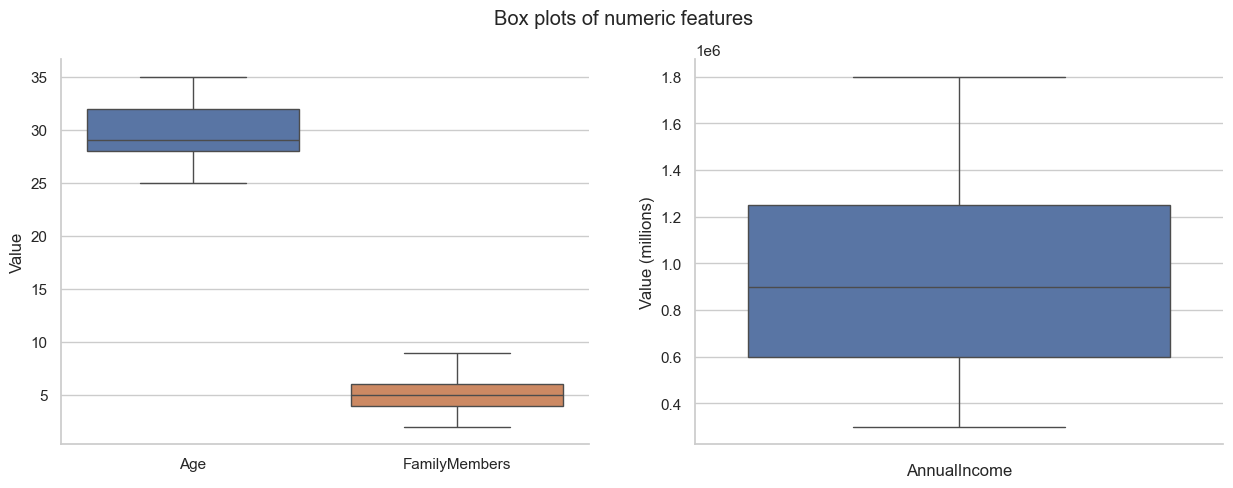

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(df[['Age', 'FamilyMembers']], ax=ax1)
sns.boxplot(df['AnnualIncome'], ax=ax2)
plt.suptitle('Box plots of numeric features')
ax1.set_ylabel('Value')
ax2.set_ylabel('Value (millions)')
ax2.set_xlabel('AnnualIncome');

No outliers seem to be present. Just in case we will pass it through the function which filters based on 1.5IQR threshold.\
The range of numbers in numeric features also seem reasonable and nothing seems to indicate erroneaus data.

In [9]:
find_outliers(df)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


### Category exploration

Next we want to count the amount of categories for our categorical features and make sure we understand them well:

In [10]:
print('Unique categorical classes:')
print('\n')
for column in df.columns:
    if column not in ('Age', 'FamilyMembers', 'AnnualIncome'):
        print(df[column].unique())
        print('\n')

Unique categorical classes:


['Government Sector' 'Private Sector/Self Employed']


['Yes' 'No']


[1 0]


['No' 'Yes']


['No' 'Yes']


[0 1]




**All** of the categorical features contain binary categories even the **Employment Type** which was thought to be multiclass.

## Numeric variable exploration

## Distributions

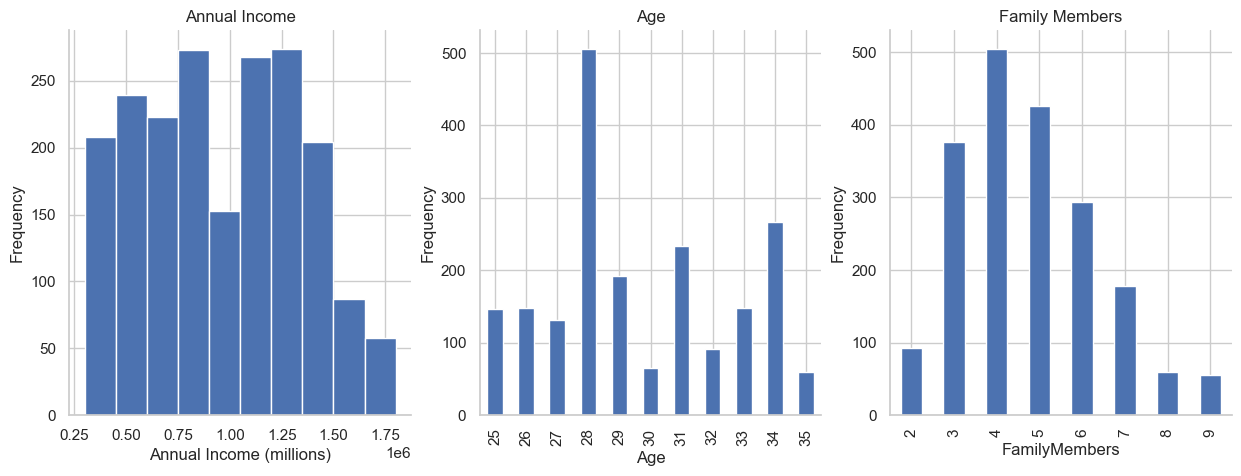

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
df['AnnualIncome'].plot(kind='hist', title='Annual Income', ax=ax1)
df['Age'].value_counts().sort_index().plot(kind='bar', title='Age', ax=ax2)
df['FamilyMembers'].value_counts().sort_index().plot(kind='bar', title='Family Members', ax=ax3)

ax1.set_xlabel('Annual Income (millions)')
ax2.set_ylabel('Frequency')
ax3.set_ylabel('Frequency');

**Income**:
- The income distribution for this sample doesn't quite follow the usual right-skewed shape that comes for income distributions.

**Age**:
- 28 year-olds are by far the most common group in this sample.

**Family Members**:
- Sample entities least commonly have **2**, **8** or **9** family members.

### Deeper look into age 28

In [ ]:
#############

## Intercorrelation of numeric features

It seems reasonable to expect that age, family member count and income have some sort of relationships between each other.\
Let's explore this:

In [41]:
cols = ['AnnualIncome', 'Age', 'FamilyMembers']

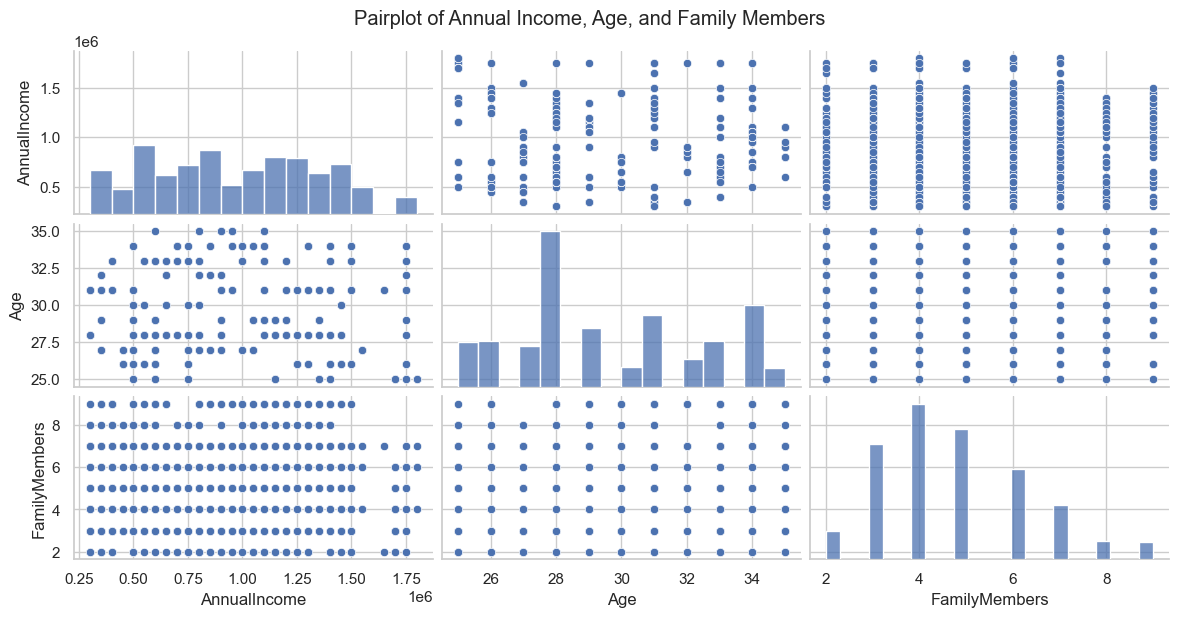

In [58]:
sns.pairplot(df[cols], kind='scatter', height=2, aspect=2)
plt.suptitle('Pairplot of Annual Income, Age, and Family Members', y=1.02);

Summary with correlation:

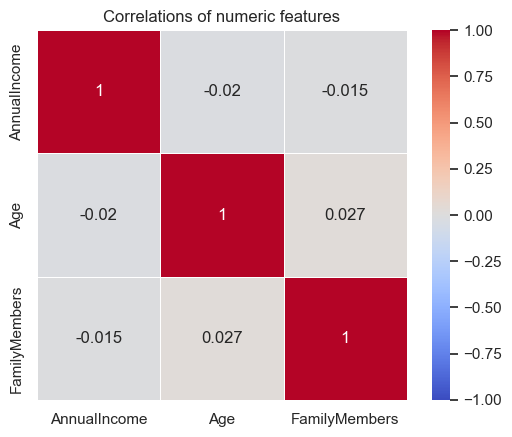

In [62]:
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5)
plt.title('Correlations of numeric features');

There seems to be very little relationship between numeric features.

## Relationship to the target variable

## Distribution of categorical variables

# Inference

# Modeling

# Suggestions